# Introduction to Deep Learning, HW 1

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
% matplotlib inline

## Problem 2: Algorithmic Implementation of a Multi-Class Logistic Regression without TensorFlow (30 Points)

In [4]:
# Import the MNIST dataset from TensorFlow
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Defining the gradient and loss functions for logistic regression:

In [5]:
def lr_gradient(current_W,current_b,data_minibatch):
    minibatch_size = data_minibatch[0].shape[0]
    
    # calculate the gradient on the data
    z = np.matmul(data_minibatch[0], current_W) + current_b
    a = np.exp(z) / np.sum(np.exp(z),axis=1).reshape((minibatch_size,1))

    dLdz = a - data_minibatch[1]
    dzdW = data_minibatch[0]
    
    W_grad = np.matmul(dzdW.T, dLdz) / minibatch_size
    b_grad = np.mean(dLdz, axis=0)
    return W_grad, b_grad

In [6]:
def lr_loss(current_W,current_b,minibatch_images, minibatch_labels):
    minibatch_size = minibatch_images.shape[0]
    # calculate the loss
    z = np.matmul(minibatch_images, current_W) + current_b
    a = np.exp(z) / np.sum(np.exp(z),axis=1).reshape((minibatch_size,1))
    avg_loss = np.mean(-np.sum(np.multiply(minibatch_labels, np.log(a)),axis=1))
    return avg_loss

Running the stochastic gradient descent optimization loop:

In [7]:
max_iterations = 5000 # choose the max number of iterations
step_size = 0.1 # step size
W = np.random.normal(scale=0.1, size=(784,10)) # starting parameters (connection weights)
b = np.zeros(10) # starting parameters (biases)
training_loss_history = []
for iter in range(0, max_iterations):
    data_minibatch = mnist.train.next_batch(100)
    W_grad, b_grad = lr_gradient(W, b, data_minibatch)
    training_loss_history.append(lr_loss(W,b,data_minibatch[0], data_minibatch[1]))
    W = W - step_size * W_grad
    b = b - step_size * b_grad

Visualizing the learning curve:

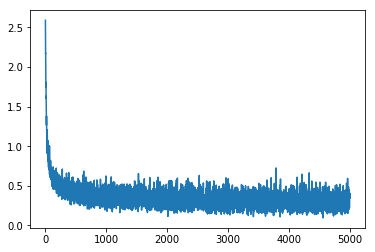

In [8]:
plt.plot(training_loss_history)

Calculating training loss and accuracy and validation loss and accuracy:

In [9]:
train_loss = lr_loss(W, b, mnist.train.images, mnist.train.labels)
z_train = np.matmul(mnist.train.images, W) + b
a_train = np.exp(z_train) / np.sum(np.exp(z_train))
train_accuracy = np.mean(np.equal(np.argmax(a_train, 1), np.argmax(mnist.train.labels, 1)))

test_loss = lr_loss(W, b, mnist.test.images, mnist.test.labels)
z_test = np.matmul(mnist.test.images, W) + b
a_test = np.exp(z_test) / np.sum(np.exp(z_test))
test_accuracy = np.mean(np.equal(np.argmax(a_test, 1), np.argmax(mnist.test.labels, 1)))

print('Training loss: {0}'.format(train_loss))
print('Training accuracy: {0}\n'.format(train_accuracy))

print('Test loss: {0}'.format(test_loss))
print('Test accuracy: {0}'.format(test_accuracy))

Training loss: 0.28995070285598074
Training accuracy: 0.9182727272727272

Test loss: 0.28291572542156607
Test accuracy: 0.9211


## Problem 3: Algorithmic Implementation of a Multi-Class Logistic Regression with TensorFlow (30 Points)

### (a)	Set up a logistic regression network, and learn it on MNIST using stochastic gradient descent.

In [11]:
# Modeling Definition
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.truncated_normal([784, 10], stddev=0.1))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# Learning
# Create a Session object, initialize all variables
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# Train
for iter in range(5000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Evaluation
# Test trained model
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print('Training loss: {0}'.format(sess.run(cross_entropy, feed_dict={x: mnist.train.images, y_:mnist.train.labels})))
print('Training accuracy: {0}\n'.format(sess.run(accuracy, feed_dict={x: mnist.train.images, y_: mnist.train.labels})))
print('Test loss: {0}'.format(sess.run(cross_entropy, feed_dict={x: mnist.test.images, y_:mnist.test.labels})))
print('Test accuracy: {0}'.format(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels})))

sess.close()

Training loss: 0.2894737422466278
Training accuracy: 0.9205999970436096

Test loss: 0.2852165400981903
Test accuracy: 0.9222000241279602


### (b)	Set up an MLP with a single hidden layer (you can choose the number of hidden nodes) and learn it on MNIST using stochastic gradient descent.

In [12]:
def train_MLP(num_hidden_nodes, dataset):
    tf.reset_default_graph()

    # Model parameters
    W1 = tf.Variable(tf.truncated_normal([784, num_hidden_nodes], stddev=0.1))
    b1 = tf.Variable(tf.zeros([num_hidden_nodes]))
    W2 = tf.Variable(tf.truncated_normal([num_hidden_nodes, 10], stddev=0.1))
    b2 = tf.Variable(tf.zeros([10]))

    # Placeholders
    x = tf.placeholder(tf.float32, [None, 784])
    y_ = tf.placeholder(tf.float32, [None, 10])

    # MLP
    h = tf.nn.relu(tf.matmul(x, W1) + b1)
    y = tf.matmul(h, W2) + b2

    # Cross-entropy loss and optimizer
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
    
    # Create a Session object, initialize all variables
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        # Train
        for iter in range(5000):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        
        # Evaluation
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        valid_loss = sess.run(cross_entropy, feed_dict={x: dataset.images, y_: dataset.labels})
        valid_accuracy = sess.run(accuracy, feed_dict={x: dataset.images, y_: dataset.labels})
    
    return valid_loss, valid_accuracy

# Effect of number of hidden nodes
hidden_nodes = np.array([100, 300, 500, 700])
hidden_accuracy = []

for num_nodes in hidden_nodes:
    valid_loss, valid_accuracy = train_MLP(num_nodes, mnist.validation)
    print('{0} hidden nodes accuracy: {1}'.format(num_nodes, valid_accuracy))
    hidden_accuracy.append(valid_accuracy)

# Evaluation
# Test trained model
best_model = hidden_nodes[np.argmax(hidden_accuracy)]
print('\nUsing {0} hidden nodes for final test accuracy.\n'.format(best_model))
test_loss, test_accuracy = train_MLP(best_model, mnist.test)

print('Test loss: {0}'.format(test_loss))
print('Test accuracy: {0}'.format(test_accuracy))

100 hidden nodes accuracy: 0.9688000082969666
300 hidden nodes accuracy: 0.9750000238418579
500 hidden nodes accuracy: 0.9765999913215637
700 hidden nodes accuracy: 0.9764000177383423

Using 500 hidden nodes for final test accuracy.

Test loss: 0.0905374214053154
Test accuracy: 0.972599983215332


### (c)	Set up an MLP with two hidden layers (i.e. lecture 2, slide 55)

In [13]:
def train_MLP(num_hidden_nodes_1, num_hidden_nodes_2, dataset):
    tf.reset_default_graph()

    # Model parameters
    W1 = tf.Variable(tf.truncated_normal([784, num_hidden_nodes_1], stddev=0.1))
    b1 = tf.Variable(tf.zeros([num_hidden_nodes_1]))
    W2 = tf.Variable(tf.truncated_normal([num_hidden_nodes_1, num_hidden_nodes_2], stddev=0.1))
    b2 = tf.Variable(tf.zeros([num_hidden_nodes_2]))
    W3 = tf.Variable(tf.truncated_normal([num_hidden_nodes_2, 10], stddev=0.1))
    b3 = tf.Variable(tf.zeros([10]))

    # Placeholders
    x = tf.placeholder(tf.float32, [None, 784])
    y_ = tf.placeholder(tf.float32, [None, 10])

    # MLP
    h1 = tf.nn.relu(tf.matmul(x,  W1) + b1)
    h2 = tf.nn.relu(tf.matmul(h1, W2) + b2)
    y = tf.matmul(h2, W3) + b3

    # Cross-entropy loss and optimizer
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
    
    # Create a Session object, initialize all variables
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        # Train
        for iter in range(5000):
            batch_xs, batch_ys = mnist.train.next_batch(100)
            sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
        
        # Evaluation
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        valid_loss = sess.run(cross_entropy, feed_dict={x: dataset.images, y_: dataset.labels})
        valid_accuracy = sess.run(accuracy, feed_dict={x: dataset.images, y_: dataset.labels})
    
    return valid_loss, valid_accuracy

# Effect of number of hidden nodes
hidden_nodes_1 = [300, 500, 700, 500, 700, 700]
hidden_nodes_2 = [100, 100, 100, 300, 300, 500]
hidden_accuracy = []

for i in range(len(hidden_nodes_1)):
    valid_loss, valid_accuracy = train_MLP(hidden_nodes_1[i], hidden_nodes_2[i], mnist.validation)
    print('{0}/{1} hidden nodes accuracy: {2}'.format(hidden_nodes_1[i], hidden_nodes_2[i], valid_accuracy))
    hidden_accuracy.append(valid_accuracy)

# Evaluation
# Test trained model
best_model = (hidden_nodes_1[np.argmax(hidden_accuracy)], hidden_nodes_2[np.argmax(hidden_accuracy)])
print('\nUsing {0}/{1} hidden nodes for final test accuracy.\n'.format(best_model[0], best_model[1]))
test_loss, test_accuracy = train_MLP(best_model[0], best_model[1], mnist.test)

print('Test loss: {0}'.format(test_loss))
print('Test accuracy: {0}'.format(test_accuracy))

300/100 hidden nodes accuracy: 0.977400004863739
500/100 hidden nodes accuracy: 0.9775999784469604
700/100 hidden nodes accuracy: 0.9778000116348267
500/300 hidden nodes accuracy: 0.977400004863739
700/300 hidden nodes accuracy: 0.975600004196167
700/500 hidden nodes accuracy: 0.9805999994277954

Using 700/500 hidden nodes for final test accuracy.

Test loss: 0.07037129998207092
Test accuracy: 0.9789000153541565


## Problem 4: Performance Comparison (20 points)

### (a)	Did your implementations and TensorFlow’s implementations from problems 2 and 3 perform the same?

Yes. As shown above in the printed validation accuracies, both the manual implementation of logistic regression without TensorFlow and the implementation with TensorFlow achieved accuracies of approximately 92% (respectively, accuracies of 92.1% and 92.2%).

### (b)	What is the validation accuracy from the multi-class logistic regression?

Again, as shown above, the multi-class logistic regression achieved a classification accuracy of approximately 92%.

### (c)	What is the validation accuracy from the multi-class MLP with a single hidden layer?  If you change the number of nodes in the hidden layer, how susceptible is the hold out performance?

The following numbers of hidden nodes were tested: 100, 300, 500, and 700. As shown above, increasing the number of nodes from 100 to 300 to 500 caused the performance to improve slightly (from 96.9% to 97.5% to 97.7%), while 500 and 700 hidden nodes had similar performances.

Ultimately, with 500 hidden nodes, the test accuracy was 97.3%.

### (d)	What is the validation accuracy from the multi-class MLP with two hidden layers?  If you change the number of nodes in the hidden layers, how susceptible is the hold out performance?

The following combinations of numbers of hidden nodes were tested:
1. 300 in the first layer and 100 in the second layer
2. 500 in the first layer and 100 in the second layer
3. 700 in the first layer and 100 in the second layer
4. 500 in the first layer and 300 in the second layer
5. 700 in the first layer and 300 in the second layer
6. 700 in the first layer and 500 in the second layer

As shown above, varying the number of nodes did not significantly impact the hold out performance, though the best-performing combination was 700 nodes in first hidden layer and 500 nodes inthe second hidden layer (validation accuracy of 98.1%).

Ultimately, with this combination, the accuracy on the final test dataset was 97.9%.

### (e)	Do you match my reported accuracies (lecture 2, slide 58)?

Yes. Logistic regression was reported to have an accuracy of approximately 91%, and I found an accuracy of 92%. A single-hidden-layer MLP was reported to have an accuracy of approximately 96%, and I found an accuracy of 97.3%. The slight discrepancies are just due to randomness in the trained model; no bias is expected since the test dataset was evaluated only a single time after all training/validation was complete.